In [91]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Load images

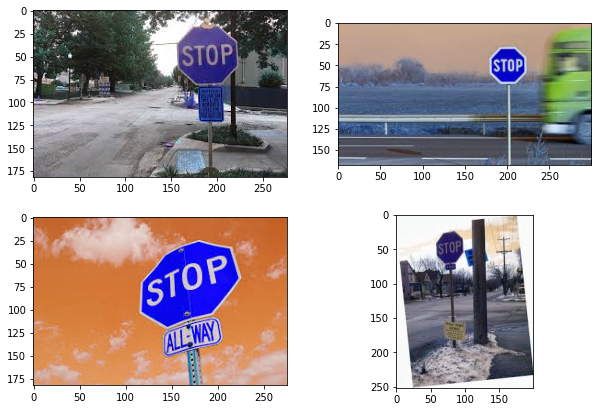

In [92]:
plt.figure(figsize = (10,7))
imgs = [cv2.imread("./stopsigns_img/images1.jpeg"),cv2.imread("./stopsigns_img/images2.jpeg"),
        cv2.imread("./stopsigns_img/images3.jpeg"),cv2.imread("./stopsigns_img/images4.jpeg")]
for i in range(4): 
    plt.subplot(2,2,i+1)
    plt.imshow(imgs[i])

## Transfer to HSV 

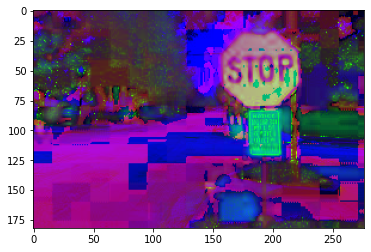

In [93]:
img = imgs[0]

hsv=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv)

In [94]:
print(hsv[25,200],hsv[75,200], hsv[50,200])

[178 118 143] [177 206 115] [149  34 151]


## Filter color

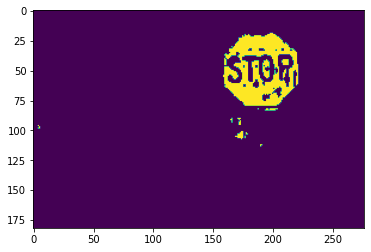

In [95]:
blue_lower=np.array([150,100,70])
blue_upper=np.array([200,255,255])
mask=cv2.inRange(hsv,blue_lower,blue_upper) 
plt.imshow(mask)

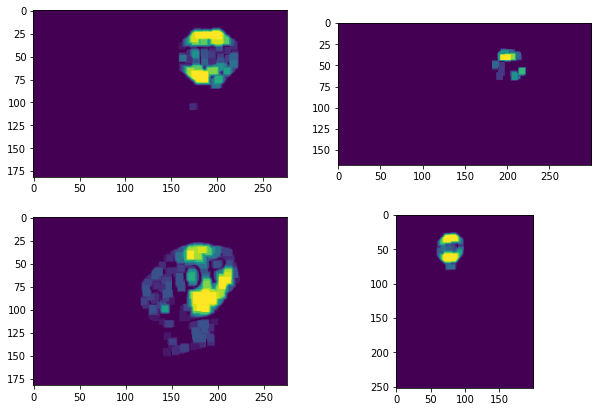

In [96]:
plt.figure(figsize=(10,7))

imgss = []
for i in range(4): 
    plt.subplot(2,2,i+1)
    hsv=cv2.cvtColor(imgs[i],cv2.COLOR_BGR2HSV)
    blue_lower=np.array([150,100,70])
    blue_upper=np.array([200,255,255])
    mask=cv2.inRange(hsv,blue_lower,blue_upper) 
    #模糊
    blurred=cv2.blur(mask,(4,4)) 
    
    erode=cv2.erode(blurred,None,iterations=3) 
    dilate=cv2.dilate(erode,None,iterations=3)
    imgss.append(dilate)
    
    plt.imshow(dilate)

## Position caculation

In [97]:
center_ls = []
for img in imgss:
    x_ls = []
    y_ls = []
    for x in range(len(img)):
        for y in range(len(img[0])):
            if img[x,y] > 50:
                x_ls.append(x)
                y_ls.append(y)            
    # print(len(img), len(img[0]))
    center_ls.append([int(np.mean(x_ls)), int(np.mean(y_ls))])

    print(np.mean(x_ls), np.mean(y_ls))
print(center_ls)

51.49899638699318 190.80208751505418
44.753846153846155 204.47179487179488
72.96564239051537 179.47665134285023
49.86694975230007 78.03326256192499
[[51, 190], [44, 204], [72, 179], [49, 78]]


## Show Result

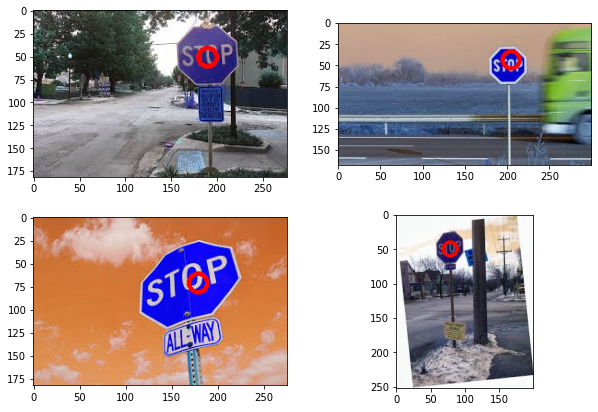

In [100]:
plt.figure(figsize=(10,7))

imgss = []
for i in range(4):  
    plt.subplot(2,2,i+1)
    cv2.circle(imgs[i], (center_ls[i][1], center_ls[i][0]), 10, (255, 0, 0), 4)
    plt.imshow(imgs[i])